In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
"""載入訓練資料及預測資料"""
train = pd.read_csv('D:/week1_homework/train.csv',encoding = "utf-8",dtype = {'type':np.int32})
test = pd.read_csv('D:/week1_homework/test.csv',encoding = "utf-8",dtype = {'type':np.int32})
submission = pd.read_csv('D:/week1_homework/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

In [61]:
list(train)  #觀察資料的特徵及屬性 
print(train) #觀察資料是否有缺失值

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度              屬種  type
0      1   5.4   3.7   1.5   0.2     Iris-setosa     1
1      2   4.8   3.4   1.6   0.2     Iris-setosa     1
2      3   4.8   3.0   1.4   0.1     Iris-setosa     1
3      4   4.3   3.0   1.1   0.1     Iris-setosa     1
4      5   5.8   4.0   1.2   0.2     Iris-setosa     1
5      6   5.7   4.4   1.5   0.4     Iris-setosa     1
6      7   5.4   3.9   1.3   0.4     Iris-setosa     1
7      8   5.1   3.5   1.4   0.3     Iris-setosa     1
8      9   5.7   3.8   1.7   0.3     Iris-setosa     1
9     10   5.1   3.8   1.5   0.3     Iris-setosa     1
10    11   5.4   3.4   1.7   0.2     Iris-setosa     1
11    12   5.1   3.7   1.5   0.4     Iris-setosa     1
12    13   4.6   3.6   1.0   0.2     Iris-setosa     1
13    14   5.1   3.3   1.7   0.5     Iris-setosa     1
14    15   4.8   3.4   1.9   0.2     Iris-setosa     1
15    16   5.0   3.0   1.6   0.2     Iris-setosa     1
16    17   5.0   3.4   1.6   0.4     Iris-setosa     1
17    18  

In [62]:
train[['花萼長度']] = train[['花萼長度']].fillna(np.mean(train[['花萼長度']]))#花萼長度有nan值，利用取平均數填值
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))#花萼寬度有nan值，利用取平均數填值
train = round(train,1)#讓所有數保持在小數點第一位

In [63]:

train_type_equal4 = train[train['type']==4] 
train_type_unequal4 = train[train['type']!=4]


In [64]:
"""***********************************************
本段目的
利用KNN，將屬性Iris-new_type的資料，分類到其他三種屬性
***********************************************"""


from sklearn.model_selection import train_test_split
X = train[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']]
y = train['type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100) #將非Iris-new_type資料做切割，分為訓練(train)及測試(test)，取資料3成作為test

"""標準化"""
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

"""KNN"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 3,weights = 'uniform')
knn.fit(X_train_std,y_train)
print(metrics.classification_report(y_test,knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,knn.predict(X_test_std)))
""""""

"""將type = 4的種類利用KNN,歸類到1~3的屬性"""
import xgboost as xgb
X_train_type_equal4 = train_type_equal4[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']] 
gbm = xgb.XGBClassifier(n_estimators=2000,max_depth = 4).fit(X_train,y_train)
train_type_equal4['type'] = gbm.predict(X_train_type_equal4[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']])
""""""
print(train_type_equal)


             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.89      0.89      0.89         9
          3       0.93      0.93      0.93        15

avg / total       0.95      0.95      0.95        37

[[13  0  0]
 [ 0  8  1]
 [ 0  1 14]]


D:\PYthon\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\PYthon\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'train_type_equal' is not defined

In [65]:
train = pd.concat([train_type_unequal4, train_type_equal4])  #合併train_type_unequal4及新的train_type_equal4


In [66]:
"""***************************************************

將新的train data 用SVM分類並預測test data 的type

***************************************************"""
X = train[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']]
y = train['type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

"""標準化"""
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



"""SVM"""
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(C = 1.0,kernel = "rbf",probability = True)
svc.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,svc.predict(X_test_std)))



             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.89      0.89      0.89         9
          3       0.93      0.93      0.93        15

avg / total       0.95      0.95      0.95        37

[[13  0  0]
 [ 0  8  1]
 [ 0  1 14]]


In [67]:
import xgboost as xgb
gbm = xgb.XGBClassifier(n_estimators=2000,max_depth = 4).fit(X_train,y_train)
print(metrics.classification_report(y_test,gbm.predict(X_test)))
print("Score:",gbm.score(X_test,y_test)) #顯示訓練後的分數




             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.89      0.89      0.89         9
          3       0.93      0.93      0.93        15

avg / total       0.95      0.95      0.95        37

Score: 0.9459459459459459


D:\PYthon\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\PYthon\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.08749405 0.56110317 0.24750356 0.10389919]


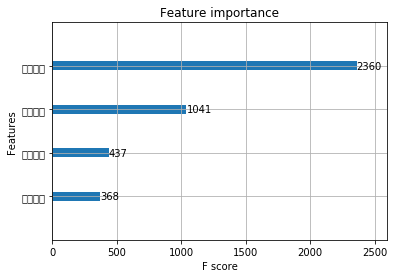

In [68]:
"""特徵重要程度"""
print(gbm.feature_importances_)

from xgboost import plot_importance
plot_importance(gbm,)
plt.show()



In [69]:
"""利用訓練後模型套用到預測資料並預測其type"""
pred = gbm.predict(test[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']])
pred

D:\PYthon\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

In [70]:
StackingSubmission = pd.DataFrame({'id':submission.id,'type':pred})
StackingSubmission.to_csv("submission.csv",index = False)



In [71]:
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
